# adding missing links with 4 strategies and analyse the epidemic bahaviour 1)add random 2)add based on distance 3)add based on frequency 4)add based on recency

In [2]:
import copy
import sys
import random 
import numpy as np
import statistics
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
import pandas as pd
import feather as ft
import geopandas as gpd
import math
import geopy.distance
import unidecode

In [32]:
#%run Function_flow_map.ipynb
%run Function_epidemic.ipynb

In [13]:
#read dataset and add a column for microregion name to the properties
dataframe=pd.read_csv('Clean_dataset/clean_data_comprehensive.csv')


#assign name of mesoregion and microregion to the properties
import unidecode
#pip install Unidecode
dc_Meso= pd.read_excel('dc_Meso_index.xlsx')
def city_code_origin_mesoregion_name(row):
    for i in range(len(dc_Meso)):
        if row['Codigo_Municipio_de_Origem']==dc_Meso.loc[i,'city_code']:
            s=dc_Meso.loc[i,'Mesoregion']
            return unidecode.unidecode(s.upper())
def city_code_destination_mesoregion_name(row):
    for i in range(len(dc_Meso)):
        if row['Codigo_Municipio_de_Destino']==dc_Meso.loc[i,'city_code']:
            s=dc_Meso.loc[i,'Mesoregion']
            return unidecode.unidecode(s.upper())

def city_code_origin_microregion_name(row):
    for i in range(len(dc_Meso)):
        if row['Codigo_Municipio_de_Origem']==dc_Meso.loc[i,'city_code']:
            return dc_Meso.loc[i,'Microregion']
def city_code_destination_microregion_name(row):
    for i in range(len(dc_Meso)):
        if row['Codigo_Municipio_de_Destino']==dc_Meso.loc[i,'city_code']:
            return dc_Meso.loc[i,'Microregion']
        
dataframe['oigin_mesoregion_name']=dataframe.apply(lambda row:city_code_origin_mesoregion_name(row), axis=1)    
dataframe['destination_mesoregion_name']=dataframe.apply(lambda row:city_code_destination_mesoregion_name(row), axis=1) 
dataframe['oigin_microregion_name']=dataframe.apply(lambda row:city_code_origin_microregion_name(row), axis=1)    
dataframe['destination_microregion_name']=dataframe.apply(lambda row:city_code_destination_microregion_name(row), axis=1) 




#fix the name of mesoregion
dict_fix={'Sul/\u200bSudoeste de Minas':'SUL/SUDOESTE DE MINAS',\
          'Triângulo Mineiro/\u200bAlto Paranaiba':'TRIÂNGULO MINEIRO/ALTO PARANAÍBA'}

def fix_name_origin(row):
    for i in range(2):
        if row['oigin_mesoregion_name']==list(dict_fix)[i]:
            return dict_fix[list(dict_fix)[i]]
        else:
            return row['oigin_mesoregion_name']
            
        
def fix_name_dest(row):
    for i in range(2):
        if row['destination_mesoregion_name']==list(dict_fix)[i]:
            return dict_fix[list(dict_fix)[i]]
        else:
            return row['destination_mesoregion_name']
        
dataframe['oigin_mesoregion_name']=dataframe.apply(lambda row:fix_name_origin(row), axis=1)    
dataframe['destination_mesoregion_name']=dataframe.apply(lambda row:fix_name_dest(row), axis=1)

dataframe.to_csv('Clean_dataset/clean_data_comprehensive_final.csv')

In [196]:
import unidecode
#pip install Unidecode
unidecode.unidecode('TRIÂNGULO MINEIRO/ALTO PARANAÍBA')

'TRIANGULO MINEIRO/ALTO PARANAIBA'

In [185]:
dc_micro=gpd.read_file('mg_gps_map_data/mcrrgn_mg/31MI2500G.shp')
dc_micro

,mslink,mapid,codigo,area_1,perimetro_,geocodigo,nome,area_tot_g,geometry
0,332,99,310519,11980.072,819.283,310519,PATROCINIO,11980.072,"POLYGON ((-47.89399 -18.67625, -47.86443 -18.6..."
1,333,99,310624,10509.238,834.422,310624,TRES MARIAS,10509.238,"POLYGON ((-45.78434 -19.15800, -45.78421 -19.1..."
2,334,99,311261,4855.959,478.520,311261,MANHUACU,4855.959,"POLYGON ((-42.55594 -20.26745, -42.55289 -20.2..."
3,335,99,311260,4874.814,536.449,311260,PONTE NOVA,4874.814,"POLYGON ((-43.17789 -20.27223, -43.17106 -20.2..."
4,336,99,310839,4406.268,441.977,310839,IPATINGA,4406.268,"POLYGON ((-43.04661 -19.56371, -43.04599 -19.5..."
...,...,...,...,...,...,...,...,...,...
61,393,99,310838,1851.894,246.132,310838,MANTENA,1851.894,"POLYGON ((-41.54046 -18.58193, -41.53673 -18.5..."
62,394,99,311158,5772.168,533.470,311158,SAO JOAO DEL REI,5772.168,"POLYGON ((-44.73319 -21.21248, -44.72438 -21.2..."
63,395,99,310310,7348.029,692.568,310310,DIAMANTINA,7348.029,"POLYGON ((-44.06915 -18.56832, -44.05639 -18.5..."
64,396,99,310733,3146.449,363.469,310733,OURO PRETO,3146.449,"POLYGON ((-43.97676 -20.22269, -43.96612 -20.2..."


In [69]:
#fix the name of mesoregion
dict_fix={'Triângulo Mineiro/\u200bAlto Paranaiba':'TRIÂNGULO MINEIRO/ALTO PARANAÍBA'}


def fix_name_origin(row):
    if row['oigin_mesoregion_name']==list(dict_fix)[0]:
        return dict_fix[list(dict_fix)[0]]
    else:
        return row['oigin_mesoregion_name']
            
        
def fix_name_dest(row):
    if row['destination_mesoregion_name']==list(dict_fix)[0]:
        return dict_fix[list(dict_fix)[0]]
    else:
        return row['destination_mesoregion_name']
        
dataframe['oigin_mesoregion_name']=dataframe.apply(lambda row:fix_name_origin(row), axis=1)    
dataframe['destination_mesoregion_name']=dataframe.apply(lambda row:fix_name_dest(row), axis=1)


In [15]:
dataframe=pd.read_csv('Clean_dataset/clean_data_comprehensive_final.csv')
dict_year_month_day_number={'2013':{1:(0,30),2:(31,58),3:(59,89),4:(90,119),5:(120,150),6:(151,180),7:(181,211),\
        8:(212,242),9:(243,272),10:(272,303),11:(304,333),12:(334,364)},'2014':{1:(365,395),2:(396,423),3:(424,454),\
                4:(455,484),5:(485,515),6:(516,545),7:(546,576),8:(577,607),9:(608,637),10:(638,668),11:(669,698),\
                12:(699,729)},'2015':{1:(730,760),2:(761,788),3:(789,819),4:(820,849),5:(850,880),6:(881,910),\
                7:(911,941),8:(941,972),9:(973,1002),10:(1003,1033),11:(1034,1063),12:(1064,1094)},'2016':{1:(1095,1125)\
                ,2:(1126,1154),3:(1155,1185),4:(1186,1215),5:(1216,1246),6:(1247,1276),7:(1277,1307),8:(1308,1338)\
                ,9:(1339,1368),10:(1369,1399),11:(1400,1429),12:(1430,1459)}}

dc_Meso_index= pd.read_excel('dc_Meso_index.xlsx').set_index('Mesoregion') 
center_list_code=list(dc_Meso_index.loc[['Central Mineira','Metropolitana de Belo Horizonte'],'city_code']) 
north_list_code=list(dc_Meso_index.loc[['Noroeste de Minas','Norte de Minas'],'city_code']) 
east_list_code=list(dc_Meso_index.loc[['Jequitinhonha','Vale do Mucuri','Vale do Rio Doce'],'city_code']) 
south_list_code=list(dc_Meso_index.loc[['Campo das Vertentes','Oeste de Minas','Sul/​Sudoeste de Minas','Zona da Mata'],'city_code']) 
west_list_code=list(dc_Meso_index.loc[['Triângulo Mineiro/​Alto Paranaiba'],'city_code'])

#generate network
month_day=dict_year_month_day_number['2013'][6]
data_part=dataframe.loc[month_day[0]-1<dataframe['DAY']]
data_part=data_part.loc[data_part['DAY']<month_day[1]+1]
data_part=data_part.reset_index(drop=True)
edges_list_label=pd.DataFrame(data_part.groupby(\
    ['Codigo_Municipio_de_Origem','Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino','Codigo_Municipio_de_Destino',\
     'oigin_mesoregion_name','destination_mesoregion_name','oigin_microregion_name','destination_microregion_name']).agg(weight=('animais','sum')).reset_index())

G_july=nx.DiGraph()
for i in range(len(edges_list_label)):
    G_july.add_edge(edges_list_label['Codigo_do_Local_de_Origem'][i],\
    edges_list_label['Codigo_do_Local_de_Destino'][i],\
                    weight=edges_list_label['weight'][i]) #weight animal
     
attr={}
for j in range(len(edges_list_label)):
    attr[edges_list_label.loc[j,'Codigo_do_Local_de_Origem']]={'meso_region':edges_list_label.loc[j,'oigin_mesoregion_name']}
    attr[edges_list_label.loc[j,'Codigo_do_Local_de_Destino']]={'meso_region':edges_list_label.loc[j,'destination_mesoregion_name']}
    attr[edges_list_label.loc[j,'Codigo_do_Local_de_Origem']]={'micro_region':edges_list_label.loc[j,'oigin_microregion_name']}
    attr[edges_list_label.loc[j,'Codigo_do_Local_de_Destino']]={'micro_region':edges_list_label.loc[j,'destination_microregion_name']}
        
nx.set_node_attributes(G_july, attr)

# add missing links RANDOMELY


In [16]:
#network nodes
node_all_m0=G_july.nodes()
n_edge=G_july.number_of_edges()
#entire 10%
a=10

def add_just_missing_link_entire(Graph,a):
    list_weights=[]
    for (u,v) in Graph.edges():
        list_weights.append(Graph.adj[u][v]['weight'])
    G_o=copy.deepcopy(Graph)
    G1=copy.deepcopy(Graph)
    N_missing_link=int((a*0.01)*G1.number_of_edges())
    i=0
    while i<N_missing_link:
        node_tuple=random.sample(list(G1.nodes()), 2)

        if (node_tuple[0],node_tuple[1]) not in G1.edges():
            #first find the mean of weights of edges this node have
           #be careful if you first add new edge you will get erros in calculating mean of weight of edges
            list_neigh=list(G_o.edges(node_tuple[0],data=True))#make a list of weights of the edges incident to this node in the original network without missing link
            list_w=[item[2]['weight'] for item in list_neigh]
            G1.add_edge(node_tuple[0],node_tuple[1])
            #If node in original network do not have any edges and it is isolated
            if len(list_neigh)==0:
                G1[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_weights, 1))[0]
            #if node has neighbors we choose weight for missing link based on weights of other edges of node
            else:
                G1.adj[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_w, 1))[0]
                
        
            # this one should be select based on the distribution for the weight of the network was used
            i+=1
        
    return G1

G_random_10=add_just_missing_link_entire(G_july,10)
G_random_30=add_just_missing_link_entire(G_july,30)

# add missing links DISTANCE

# # mesoregions

In [168]:
#we need to find a probability for adding missing links inside a region as the distance is zero(because we are using
#the center coordination of regions for the properties are in.)
#then after we assin p for missing links between the propertie in same region we should use 1-p for other transactions 
#based on the distances of the centers of regions from each other
#finds the probability od missing links in the same area using the dataset of month 6
transaction=[]
for i in range(len(data_part)):
    transaction.append((data_part.loc[i,'oigin_mesoregion_name'],data_part.loc[i,'destination_mesoregion_name']))
    
cs=0
cu=0
for i in range(len(transaction)):
    if transaction[i][0]==transaction[i][1]:
        cs+=1
    else:
        cu+=1
p_same_area=cs/(cs+cu)

mg_meso=gpd.read_file('mg_gps_map_data/meso_mg/gd675sg5642.shp')
mg_meso['center_co']=mg_meso['geometry'].centroid
#we should match the names to the names we have in the nodes attribure /some of them have capital letter come lower letter
match_names={'ZONA DA MATA':'Zona da Mata','VALE DO RIO DOCE':'Vale do Rio Doce','VALE DO MUCURI':'Vale do Mucuri',\
    'TRIÂNGULO MINEIRO/ALTO PARANAÍBA':'TRIÂNGULO MINEIRO/ALTO PARANAÍBA','SUL/SUDOESTE DE MINAS':'SUL/SUDOESTE DE MINAS',\
     'OESTE DE MINAS':'Oeste de Minas', 'NORTE DE MINAS':'Norte de Minas', 'NOROESTE DE MINAS':'Noroeste de Minas' ,\
             'METROPOLITANA DE BELO HORIZONTE':'Metropolitana de Belo Horizonte','JEQUITINHONHA':'Jequitinhonha',\
             'CENTRAL MINEIRA':'Central Mineira','CAMPO DAS VERTENTES':'Campo das Vertentes' }
meso_names=list(mg_meso['nm_meso'])
distance=[]
for t in range(len(mg_meso)):
    co1=mg_meso.loc[t,'center_co']
    coords_1=(co1.x,co1.y)
    for j in range(len(mg_meso)):
        co2=mg_meso.loc[j,'center_co']
        coords_2=(co2.x,co2.y)
        d=geopy.distance.distance(coords_1, coords_2).kilometers
        distance.append((mg_meso.loc[t,'nm_meso'],mg_meso.loc[j,'nm_meso'],d))
                        
list_prob=[]
for t in range(len(meso_names)):
    li_d=[]
    for el in distance:
        if el[0]==meso_names[t]:
            if el[2]!=0:
                #the probability should be the inverse of distance/ so the sum sould be on inverse of distance
                li_d.append(1/el[2]) 
    for j in range(len(meso_names)):
        if meso_names[t]==meso_names[j]:
            list_prob.append((meso_names[t],meso_names[j],p_same_area))
        else:
            for el in distance:
                if el[0]==meso_names[t]:
                    if el[1]==meso_names[j]:
                        if el[2]!=0:
                            list_prob.append((meso_names[t],meso_names[j],((1/el[2])*p_same_area)/sum(li_d)))                 

#add missing link
#not all of the mesoregion
w_values=list(edges_list_label['weight'])
#add to the entire network 10%, 30%
n_edge=G_july.number_of_edges()
#entire 10%
a=10
l_edge=random.choices([(j[0],j[1]) for j in list_prob],weights=[(j[2]) for j in list_prob],k=round(n_edge*(a/100)))
#find distribution of trades in l_edg
T_1=set(l_edge)
l_dist=list()
for x in T_1:
    C=l_edge.count(x)
    l_dist.append([x,C])
#randomely find the edges with the specific origin destination mesoregion - add them to network randomely. the missing link
#are choosed randomely not based on past dataset
G_distance_10=G_july.copy()
for element in l_dist:

    nodes1 = [x for x,y in G_july.nodes(data=True) if y['meso_region']== match_names[element[0][0]]]     
    nodes2 = [x for x,y in G_july.nodes(data=True) if y['meso_region']== match_names[element[0][1]]]
    c=0
    while c<element[1]:
        n1=random.sample(nodes1,1)[0]
        n2=random.sample(nodes2,1)[0]
        if (n1,n2) not in list(G_distance_10.edges()):
            w=random.sample(w_values,1)
            G_distance_10.add_edge(n1, n2, weight=w[0])
            c+=1

        
#entire 30%
a=30
l_edge=random.choices([(j[0],j[1]) for j in list_prob],weights=[(j[2]) for j in list_prob],k=round(n_edge*(a/100)))
#find distribution of trades in l_edg
T_1=set(l_edge)
l_dist=list()
for x in T_1:
    C=l_edge.count(x)
    l_dist.append([x,C])
#randomely find the edges with the specific origin destination mesoregion - add them to network randomely. the missing link
#are choosed randomely not based on past dataset
G_distance_30=G_july.copy()
for element in l_dist:

    nodes1 = [x for x,y in G_july.nodes(data=True) if y['meso_region']== match_names[element[0][0]]]     
    nodes2 = [x for x,y in G_july.nodes(data=True) if y['meso_region']== match_names[element[0][1]]]
    c=0
    while c<element[1]:
        n1=random.sample(nodes1,1)[0]
        n2=random.sample(nodes2,1)[0]
        if (n1,n2) not in list(G_distance_30.edges()):
            w=random.sample(w_values,1)
            G_distance_30.add_edge(n1, n2, weight=w[0])
            c+=1
        


# # microregions

In [18]:
transaction=[]
for i in range(len(data_part)):
    transaction.append((data_part.loc[i,'oigin_microregion_name'],data_part.loc[i,'destination_microregion_name']))
    
cs=0
cu=0
for i in range(len(transaction)):
    if transaction[i][0]==transaction[i][1]:
        cs+=1
    else:
        cu+=1
p_same_area=cs/(cs+cu)




mg_micro=gpd.read_file('mg_gps_map_data/mcrrgn_mg/31MI2500G.shp')
mg_micro['center_co']=mg_micro['geometry'].centroid
#we should match the names to the names we have in the nodes attribure /some of them have capital letter come lower letter

micro_names=list(mg_micro['nome'])
distance=[]
for t in range(len(mg_micro)):
    co1=mg_micro.loc[t,'center_co']
    coords_1=(co1.x,co1.y)
    for j in range(len(mg_micro)):
        co2=mg_micro.loc[j,'center_co']
        coords_2=(co2.x,co2.y)
        d=geopy.distance.distance(coords_1, coords_2).kilometers
        distance.append((mg_micro.loc[t,'nome'],mg_micro.loc[j,'nome'],d))

mic_list_prob=[]
for t in range(len(micro_names)):
    li_d=[]
    for el in distance:
        if el[0]==micro_names[t]:
            if el[2]!=0:
                #the probability should be the inverse of distance/ so the sum sould be on inverse of distance
                li_d.append(1/el[2]) 
    for j in range(len(micro_names)):
        if micro_names[t]==micro_names[j]:
            mic_list_prob.append((micro_names[t],micro_names[j],p_same_area))
        else:
            for el in distance:
                if el[0]==micro_names[t]:
                    if el[1]==micro_names[j]:
                        if el[2]!=0:
                            mic_list_prob.append((micro_names[t],micro_names[j],((1/el[2])*(1-p_same_area))/sum(li_d)))                 

#add missing link
#not all of the mesoregion
w_values=list(edges_list_label['weight'])
#add to the entire network 10%, 30%
n_edge=G_july.number_of_edges()
#entire 10%
a=10
mic_l_edge=random.choices([(j[0],j[1]) for j in mic_list_prob],weights=[(j[2]) for j in mic_list_prob],k=round(n_edge*(a/100)))
#find distribution of trades in l_edg
T_1=set(mic_l_edge)
l_dist=list()
for x in T_1:
    C=mic_l_edge.count(x)
    l_dist.append([x,C])
#randomely find the edges with the specific origin destination mesoregion - add them to network randomely. the missing link
#are choosed randomely not based on past dataset
G_distance_mic_10=G_july.copy()
for element in l_dist:

    nodes1 = [x for x,y in G_july.nodes(data=True) if y['micro_region']== element[0][0]]     
    nodes2 = [x for x,y in G_july.nodes(data=True) if y['micro_region']== element[0][1]]
    c=0
    while c<element[1]:
        n1=random.sample(nodes1,1)[0]
        n2=random.sample(nodes2,1)[0]
        if (n1,n2) not in list(G_distance_mic_10.edges()):
            w=random.sample(w_values,1)
            G_distance_mic_10.add_edge(n1, n2, weight=w[0])
            c+=1

a=30
mic_l_edge=random.choices([(j[0],j[1]) for j in mic_list_prob],weights=[(j[2]) for j in mic_list_prob],k=round(n_edge*(a/100)))
#find distribution of trades in l_edg
T_1=set(mic_l_edge)
l_dist=list()
for x in T_1:
    C=mic_l_edge.count(x)
    l_dist.append([x,C])
#randomely find the edges with the specific origin destination mesoregion - add them to network randomely. the missing link
#are choosed randomely not based on past dataset
G_distance_mic_30=G_july.copy()
for element in l_dist:

    nodes1 = [x for x,y in G_july.nodes(data=True) if y['micro_region']== element[0][0]]     
    nodes2 = [x for x,y in G_july.nodes(data=True) if y['micro_region']== element[0][1]]
    c=0
    while c<element[1]:
        n1=random.sample(nodes1,1)[0]
        n2=random.sample(nodes2,1)[0]
        if (n1,n2) not in list(G_distance_mic_30.edges()):
            w=random.sample(w_values,1)
            G_distance_mic_30.add_edge(n1, n2, weight=w[0])
            c+=1                                

In [269]:
df_dm30, df_dm30_mean, df_dm30_min,df_dm30_max=multiran_result_SI(G_distance_mic_30)

In [257]:
#microregion distance
df_dm10, df_dm10_mean, df_dm10_min,df_dm10_max=multiran_result_SI(G_distance_mic_10)
df_dm30, df_dm30_mean, df_dm30_min,df_dm30_max=multiran_result_SI(G_distance_mic_30)


NameError: name 'G_mic_distance_mic_30' is not defined

# add missing links/ RECENCY

In [19]:
#add 3 months before start of June
data_part_before=dataframe.loc[130<dataframe['DAY']] #30
data_part_before=data_part_before.loc[data_part_before['DAY']<151]
data_part_before=data_part_before.reset_index(drop=True)
#add 3 months after end of June
data_part_after=dataframe.loc[180<dataframe['DAY']]
data_part_after=data_part_after.loc[data_part_after['DAY']<201] #272
data_part_after=data_part_after.reset_index(drop=True)

#join before and after
frames = [data_part_before, data_part_after]
data_part_recent = pd.concat(frames)

edges_list_recent=pd.DataFrame(data_part_recent.groupby(\
    ['Codigo_Municipio_de_Origem','Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino','Codigo_Municipio_de_Destino'])\
                               .size().reset_index(name="weight"))

edge_inactive_recent=pd.concat([edges_list_recent, edges_list_label, edges_list_label]).drop_duplicates(\
                subset=['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino'],keep=False).reset_index(drop=True)

#nodes of the network
node_all_m0=G_july.nodes()
edge_inactive_recent_m0=[]
for i in range(len(edge_inactive_recent)):
    if edge_inactive_recent.loc[i,'Codigo_do_Local_de_Origem'] in node_all_m0:
        if edge_inactive_recent.loc[i,'Codigo_do_Local_de_Destino'] in node_all_m0: 
            edge_inactive_recent_m0.append((edge_inactive_recent.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_inactive_recent.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_inactive_recent.loc[i,'weight']))
#probability of links
w_p=[f[2] for f in edge_inactive_recent_m0]

#add missing link
w_values=list(edges_list_label['weight'])
#add to the entire network 10%, 30%
n_edge=G_july.number_of_edges()
#entire 10%
a=10
l_edge=random.choices(edge_inactive_recent_m0,weights= w_p,k=round(n_edge*(a/100)))
G_recent_10=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_recent_10.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])

#entire 30%
a=30
l_edge=random.choices(edge_inactive_recent_m0,weights= w_p,k=round(n_edge*(a/100)))
G_recent_30=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_recent_30.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])
  

# add missing links/ FREQUENCY

In [20]:
edges_list_label_all=pd.DataFrame(dataframe.groupby(\
['Codigo_Municipio_de_Origem','Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino','Codigo_Municipio_de_Destino'])\
                                  .size().reset_index(name="weight"))
#removing the active edges(the one related to the part we like (month0) from the all edges in the network)
#this list include all nodes of the network ممکنه یخشس از این نود ها تو این نتورک یک ماهه اصلا وجود نداشته باشن و وقتی ما لینک اضافه میمنیم نود جدید هم اضافه بشه
edge_inactive_all=pd.concat([edges_list_label_all, edges_list_label, edges_list_label]).drop_duplicates(\
            subset=['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino'],keep=False).reset_index(drop=True)

#حل مشکل بالا. پیدا کردن لیست لینک های غیر فعالی که فقط بین نود ها فعال سیستم وحود دارند
edge_inactive_all_m0=[]
for i in range(len(edge_inactive_all)):
    if edge_inactive_all.loc[i,'Codigo_do_Local_de_Origem'] in node_all_m0:
        if edge_inactive_all.loc[i,'Codigo_do_Local_de_Destino'] in node_all_m0: 
            edge_inactive_all_m0.append((edge_inactive_all.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_inactive_all.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_inactive_all.loc[i,'weight']))

#probability of links
w_p=[f[2] for f in edge_inactive_all_m0]            
#add to the entire network 10%, 30%
#entire 10%
a=10
l_edge=random.choices(edge_inactive_all_m0,weights= w_p,k=round(n_edge*(a/100)))
G_freq_10=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_freq_10.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])

#entire 30%
a=30
l_edge=random.choices(edge_inactive_all_m0,weights= w_p,k=round(n_edge*(a/100)))
G_freq_30=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_freq_30.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])



# run epidemy

In [41]:
def My_Epi_SI(Graph, initial_infecteds):
    G=copy.deepcopy(Graph)
    beta=0.01#0.001#0.02085574#0.00042337#0.00084674     #missinglink #0.00006864988#0.0006864988 #0.001144#0.00134228   #0.001121#0.002242           # weight_un=#0.00095969#0.00191938 #0.00136986# previous: 0.0027397
    infected = initial_infecteds.copy()
    N=G.order()
    i=501 #number of steps of iteration
    susceptible = list(G.nodes())
    
    for infected_node in infected:
        if infected_node in susceptible: 
            susceptible.remove(infected_node)
    
    num_infected_results=[]
    num_j=[]
    num_j.append([0,float(len(infected)/N)])
    num_infected_results.append(float(len(infected)/N))
    #Inicializar el tiempo
    t = 0
    j=1
    while j<i:
        infected_1 = list()
        #Realizar la infección
        for node in infected: 
            if len(set(G.neighbors(node)))>0:
                '''strategy here is that every time the first chance is get to the highest weight of edges in node neighbors. 
                if rhe neighbor with highest weight does not infect then the second chance is based on random sample choice'''
                neigh = list(G.neighbors(node))
                if len(neigh)==1:
                    nei=neigh[0]
                    #neigh=set(G.neighbors(node))
                    if  nei not in list(infected):
                        if  nei not in list(infected_1):
                            if random.random()<1-((1-beta)**G[node][nei]['weight']):
                                infected_1.append(nei)
                # if len(edges) > 0: #some nodes have zero edges going into it #this one could be useful in directed network
                else:
                    for nbr in set(G.neighbors(node)):
                        if nbr not in list(infected):
                            if  nbr not in list(infected_1):
                                if random.random()<1-((1-beta)**G[node][nbr]['weight']):
                                    infected_1.append(nbr)
        #Remover a los infectados de los susceptibles:
        infected += infected_1
        for infected_node in infected_1:
            if infected_node in susceptible: 
                susceptible.remove(infected_node)
            

        #Registrar el porcentaje de nodos infectados en una lista para luego graficar
        num_infected_results.append(float(len(infected)/N))
        num_j.append([j,float(len(infected)/N)])
        
        #Actualizar el tiempo
        j +=1
                            
    return num_infected_results,num_j

def get_data_My_SI(Graph, IN_IN):
    I,num_I_j=My_Epi_SI(Graph,IN_IN)
    I1=pd.DataFrame(list(I), columns=['vals'])
    return I1
def multiran_result_SI(Graph):
    dfs_un=pd.DataFrame(list(range(0,501)), columns=['time'])
    for i in range(1,11):
        #time.sleep(5)
        IN_IN=random.sample(node_all_m0,int(len(node_all_m0)*0.01))
        df_un=get_data_My_SI(Graph,IN_IN)
        dfs_un.insert(i, f"vals_{i}", df_un) 
    df_all_un= dfs_un.set_index('time')
    mean_val_un = df_all_un.iloc[:,0:].mean(axis=1)
    std_val_un= df_all_un.iloc[:,0:].std(axis=1)
    min_val_un = mean_val_un - 2*std_val_un
    max_val_un = mean_val_un + 2*std_val_un
    df_all_un.reset_index(inplace = True)
    
    return df_all_un ,  mean_val_un, min_val_un,  max_val_un

In [ ]:
df, df_mean, df_min, df_max=multiran_result_SI(G_july)
#random
df_ra10, df_ra10_mean, df_ra10_min,df_ra10_max=multiran_result_SI(G_random_10)
df_ra30, df_ra30_mean, df_ra30_min,df_ra30_max=multiran_result_SI(G_random_30)
#random from dataset
#missing links are randomly selected from the trades happen in the rest of datset
df_ra_data10, df_ra_data10_mean, df_ra_data10_min,df_ra_data10_max=multiran_result_SI(G_ra_data10)
df_ra_data30, df_ra_data30_mean, df_ra_data30_min,df_ra_data30_max=multiran_result_SI(G_ra_data30)


#distance
df_d10, df_d10_mean, df_d10_min,df_d10_max=multiran_result_SI(G_distance_10)
df_d30, df_d30_mean, df_d30_min,df_d30_max=multiran_result_SI(G_distance_30)
#microregion distance
df_dm10, df_dm10_mean, df_dm10_min,df_dm10_max=multiran_result_SI(G_mic_distance_10)
df_dm30, df_dm30_mean, df_dm30_min,df_dm30_max=multiran_result_SI(G_mic_distance_30)



#recent
df_re10, df_re10_mean, df_re10_min,df_re10_max=multiran_result_SI(G_recent_10)
df_re30, df_re30_mean, df_re30_min,df_re30_max=multiran_result_SI(G_recent_30)

#frequent
df_f10, df_f10_mean, df_f10_min,df_f10_max=multiran_result_SI(G_freq_10)
df_f30, df_f30_mean, df_f30_min,df_f30_max=multiran_result_SI(G_freq_30)



In [39]:
df, df_mean, df_min, df_max=multiran_result_SI(G_july)

In [ ]:
df_re30, df_re30_mean, df_re30_min,df_re30_max=multiran_result_SI(G_recent_30)
df_f30, df_f30_mean, df_f30_min,df_f30_max=multiran_result_SI(G_freq_30)

In [24]:
#recent
df_re10, df_re10_mean, df_re10_min,df_re10_max=multiran_result_SI(G_recent_10)
df_re30, df_re30_mean, df_re30_min,df_re30_max=multiran_result_SI(G_recent_30)

#frequent
df_f10, df_f10_mean, df_f10_min,df_f10_max=multiran_result_SI(G_freq_10)
df_f30, df_f30_mean, df_f30_min,df_f30_max=multiran_result_SI(G_freq_30)


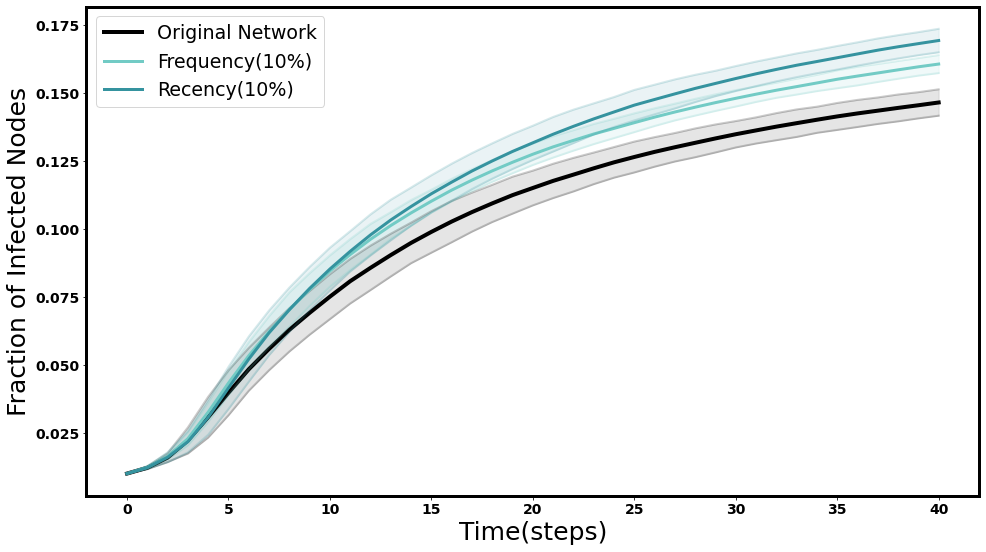

In [28]:
#plot 10% altogether
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot(df['time'], df_mean,c='black',label='Original Network',linewidth=4.0)
plt.fill_between(df['time'], df_min, df_max, color='black', alpha=.1)
plt.plot(df['time'], df_min,c='black',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_max,c='black',linewidth=2.0,alpha=.2)

#plt.plot(20,g_o, c='black', marker='o')


#Frequency
plt.plot(df_f10['time'], df_f10_mean,label='Frequency(10%)',c='#72CBC5',linewidth=3.0)
plt.fill_between(df_f10['time'], df_f10_min, df_f10_max, color='#72CBC5', alpha=.1)
plt.plot(df['time'], df_f10_min,c='#72CBC5',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_f10_max,c='#72CBC5',linewidth=2.0,alpha=.2)


#Recency
plt.plot(df_re10['time'], df_re10_mean,label='Recency(10%)',c='#35939F',linewidth=3.0)
plt.fill_between(df_re10['time'], df_re10_min, df_re10_max, color='#35939F', alpha=.1)
plt.plot(df['time'], df_re10_min,c='#35939F',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_re10_max,c='#35939F',linewidth=2.0,alpha=.2)




#plt.xlim(0,100)
plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,20)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)

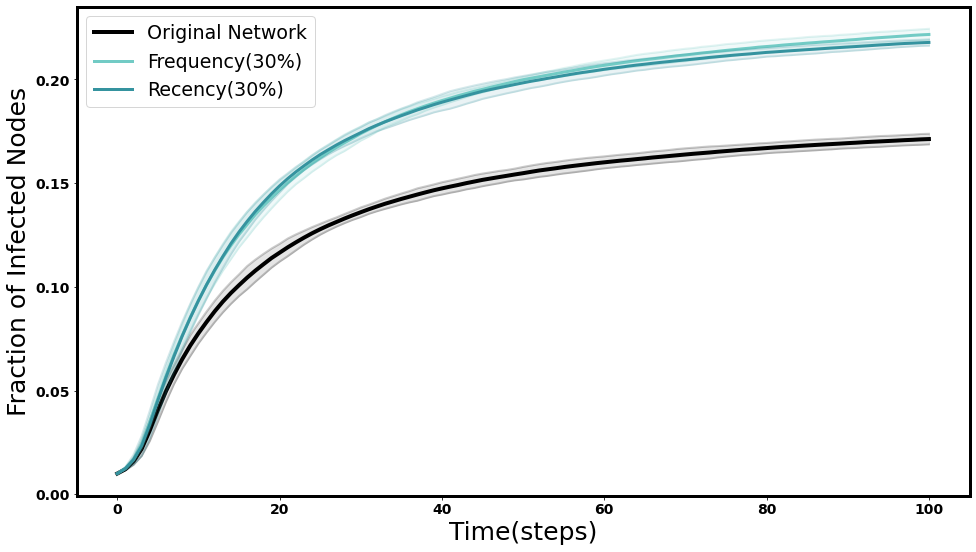

In [40]:
#plot 30% altogether
fig, ax = plt.subplots(1,1,figsize=(16,9))


plt.plot(df['time'], df_mean,c='black',label='Original Network',linewidth=4.0)
plt.fill_between(df['time'], df_min, df_max, color='black', alpha=.1)
plt.plot(df['time'], df_min,c='black',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_max,c='black',linewidth=2.0,alpha=.2)

#Frequenc

plt.plot(df_f30['time'], df_f30_mean,label='Frequency(30%)',c='#72CBC5',linewidth=3.0)
plt.fill_between(df_f30['time'], df_f30_min, df_f30_max, color='#72CBC5', alpha=.1)
plt.plot(df_f30['time'], df_f30_min,c='#72CBC5',linewidth=2.0,alpha=.2)
plt.plot(df_f30['time'], df_f30_max,c='#72CBC5',linewidth=2.0,alpha=.2)

#Recency
plt.plot(df_re30['time'], df_re30_mean,label='Recency(30%)',c='#35939F',linewidth=3.0)
plt.fill_between(df_re30['time'], df_re30_min, df_re30_max, color='#35939F', alpha=.1)
plt.plot(df_re30['time'], df_re30_min,c='#35939F',linewidth=2.0,alpha=.2)
plt.plot(df_re30['time'], df_re30_max,c='#35939F',linewidth=2.0,alpha=.2)



plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)

#plt.title('a',fontsize=20)
plt.legend(fontsize=19)

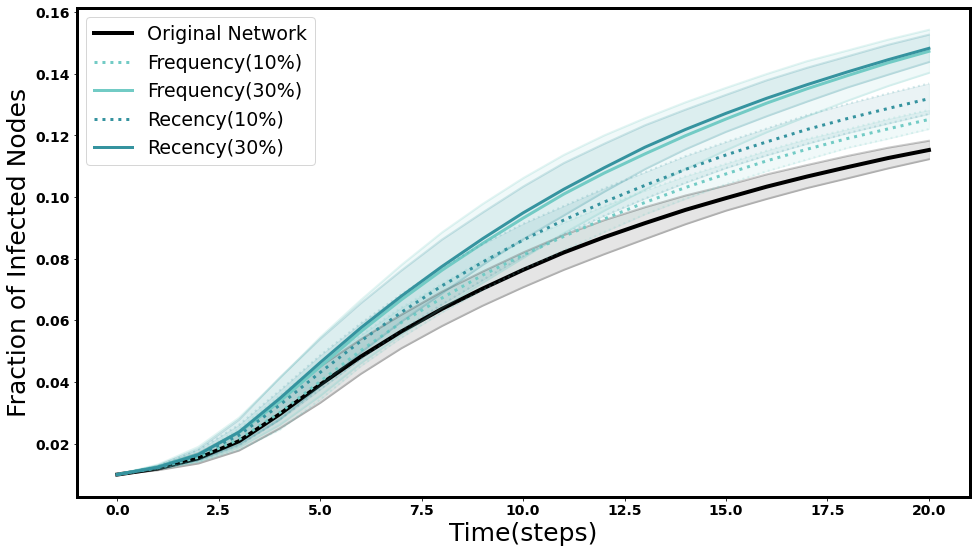

In [22]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot(df['time'], df_mean,c='black',label='Original Network',linewidth=4.0)
plt.fill_between(df['time'], df_min, df_max, color='black', alpha=.1)
plt.plot(df['time'], df_min,c='black',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_max,c='black',linewidth=2.0,alpha=.2)

#Frequency
plt.plot(df_f10['time'], df_f10_mean,label='Frequency(10%)',c='#72CBC5',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_f10['time'], df_f10_min, df_f10_max, color='#72CBC5', alpha=.1)
plt.plot(df['time'], df_f10_min,c='#72CBC5',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_f10_max,c='#72CBC5',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_f30['time'], df_f30_mean,label='Frequency(30%)',c='#72CBC5',linewidth=3.0)
plt.fill_between(df_f30['time'], df_f30_min, df_f30_max, color='#72CBC5', alpha=.1)
plt.plot(df['time'], df_f30_min,c='#72CBC5',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_f30_max,c='#72CBC5',linewidth=2.0,alpha=.2)

#Recency
plt.plot(df_re10['time'], df_re10_mean,label='Recency(10%)',c='#35939F',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_re10['time'], df_re10_min, df_re10_max, color='#35939F', alpha=.1)
plt.plot(df['time'], df_re10_min,c='#35939F',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_re10_max,c='#35939F',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_re30['time'], df_re30_mean,label='Recency(30%)',c='#35939F',linewidth=3.0)
plt.fill_between(df_re30['time'], df_re30_min, df_re30_max, color='#35939F', alpha=.1)
plt.plot(df['time'], df_re30_min,c='#35939F',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_re30_max,c='#35939F',linewidth=2.0,alpha=.2)


#plt.xlim(0,100)
plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/real_month_june_SI_0.01_just_missing_dif1%ININ_10_30_4_strategy.jpg')

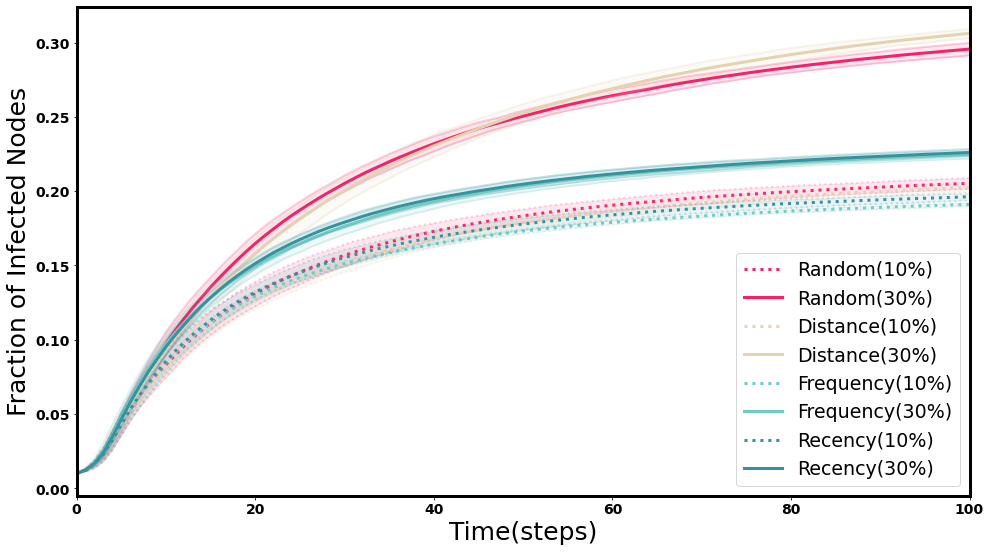

In [266]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

#plt.plot(df['time'], df_mean,c='black',label='Original Network',linewidth=4.0)
#plt.fill_between(df['time'], df_min, df_max, color='black', alpha=.1)
#plt.plot(df['time'], df_min,c='black',linewidth=2.0,alpha=.2)
#plt.plot(df['time'], df_max,c='black',linewidth=2.0,alpha=.2)


#Random
plt.plot(df_ra10['time'], df_ra10_mean,label='Random(10%)',c='#FC1F67',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_ra10['time'], df_ra10_min, df_ra10_max, color='#FC1F67', alpha=.1)
plt.plot(df['time'], df_ra10_min,c='#FC1F67',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_ra10_max,c='#FC1F67',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_ra30['time'], df_ra30_mean,label='Random(30%)',c='#FC1F67',linewidth=3.0)
plt.fill_between(df_ra30['time'], df_ra30_min, df_ra30_max, color='#FC1F67', alpha=.1)
plt.plot(df['time'], df_ra30_min,c='#FC1F67',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_ra30_max,c='#FC1F67',linewidth=2.0,alpha=.2)

#Distance
plt.plot(df_d10['time'], df_d10_mean,label='Distance(10%)',c='#E4D3B0',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_d10['time'], df_d10_min, df_d10_max, color='#E4D3B0', alpha=.1)
plt.plot(df['time'], df_d10_min,c='#E4D3B0',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_d10_max,c='#E4D3B0',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_d30['time'], df_d30_mean,label='Distance(30%)',c='#E4D3B0',linewidth=3.0)
plt.fill_between(df_d30['time'], df_d30_min, df_d30_max, color='#E4D3B0', alpha=.1)
plt.plot(df['time'], df_d30_min,c='#E4D3B0',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_d30_max,c='#E4D3B0',linewidth=2.0,alpha=.2)


#Frequency
plt.plot(df_f10['time'], df_f10_mean,label='Frequency(10%)',c='#72CBC5',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_f10['time'], df_f10_min, df_f10_max, color='#72CBC5', alpha=.1)
plt.plot(df['time'], df_f10_min,c='#72CBC5',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_f10_max,c='#72CBC5',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_f30['time'], df_f30_mean,label='Frequency(30%)',c='#72CBC5',linewidth=3.0)
plt.fill_between(df_f30['time'], df_f30_min, df_f30_max, color='#72CBC5', alpha=.1)
plt.plot(df['time'], df_f30_min,c='#72CBC5',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_f30_max,c='#72CBC5',linewidth=2.0,alpha=.2)

#Recency
plt.plot(df_re10['time'], df_re10_mean,label='Recency(10%)',c='#35939F',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_re10['time'], df_re10_min, df_re10_max, color='#35939F', alpha=.1)
plt.plot(df['time'], df_re10_min,c='#35939F',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_re10_max,c='#35939F',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_re30['time'], df_re30_mean,label='Recency(30%)',c='#35939F',linewidth=3.0)
plt.fill_between(df_re30['time'], df_re30_min, df_re30_max, color='#35939F', alpha=.1)
plt.plot(df['time'], df_re30_min,c='#35939F',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_re30_max,c='#35939F',linewidth=2.0,alpha=.2)



plt.xlim(0,100)
plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/real_month_june_SI_0.01_just_missing_dif1%ININ_10_30_4_strategy.jpg')

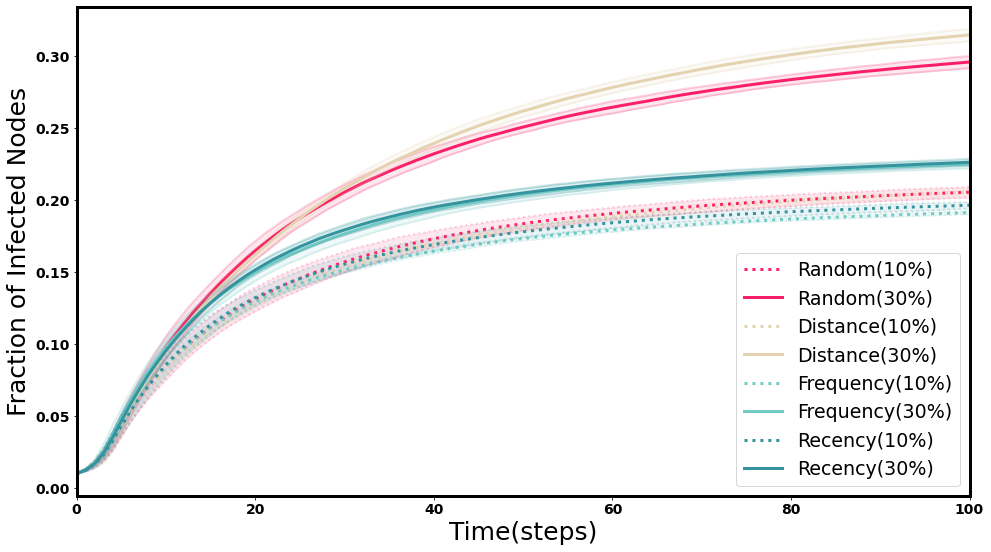

In [270]:
#plot with distance macro
fig, ax = plt.subplots(1,1,figsize=(16,9))

#plt.plot(df['time'], df_mean,c='black',label='Original Network',linewidth=4.0)
#plt.fill_between(df['time'], df_min, df_max, color='black', alpha=.1)
#plt.plot(df['time'], df_min,c='black',linewidth=2.0,alpha=.2)
#plt.plot(df['time'], df_max,c='black',linewidth=2.0,alpha=.2)


#Random
plt.plot(df_ra10['time'], df_ra10_mean,label='Random(10%)',c='#FC1F67',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_ra10['time'], df_ra10_min, df_ra10_max, color='#FC1F67', alpha=.1)
plt.plot(df['time'], df_ra10_min,c='#FC1F67',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_ra10_max,c='#FC1F67',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_ra30['time'], df_ra30_mean,label='Random(30%)',c='#FC1F67',linewidth=3.0)
plt.fill_between(df_ra30['time'], df_ra30_min, df_ra30_max, color='#FC1F67', alpha=.1)
plt.plot(df['time'], df_ra30_min,c='#FC1F67',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_ra30_max,c='#FC1F67',linewidth=2.0,alpha=.2)

#Distance-micro
plt.plot(df_dm10['time'], df_dm10_mean,label='Distance(10%)',c='#E4D3B0',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_dm10['time'], df_dm10_min, df_dm10_max, color='#E4D3B0', alpha=.1)
plt.plot(df['time'], df_dm10_min,c='#E4D3B0',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_dm10_max,c='#E4D3B0',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_dm30['time'], df_dm30_mean,label='Distance(30%)',c='#E4D3B0',linewidth=3.0)
plt.fill_between(df_dm30['time'], df_dm30_min, df_dm30_max, color='#E4D3B0', alpha=.1)
plt.plot(df['time'], df_dm30_min,c='#E4D3B0',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_dm30_max,c='#E4D3B0',linewidth=2.0,alpha=.2)


#Frequency
plt.plot(df_f10['time'], df_f10_mean,label='Frequency(10%)',c='#72CBC5',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_f10['time'], df_f10_min, df_f10_max, color='#72CBC5', alpha=.1)
plt.plot(df['time'], df_f10_min,c='#72CBC5',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_f10_max,c='#72CBC5',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_f30['time'], df_f30_mean,label='Frequency(30%)',c='#72CBC5',linewidth=3.0)
plt.fill_between(df_f30['time'], df_f30_min, df_f30_max, color='#72CBC5', alpha=.1)
plt.plot(df['time'], df_f30_min,c='#72CBC5',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_f30_max,c='#72CBC5',linewidth=2.0,alpha=.2)

#Recency
plt.plot(df_re10['time'], df_re10_mean,label='Recency(10%)',c='#35939F',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_re10['time'], df_re10_min, df_re10_max, color='#35939F', alpha=.1)
plt.plot(df['time'], df_re10_min,c='#35939F',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_re10_max,c='#35939F',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_re30['time'], df_re30_mean,label='Recency(30%)',c='#35939F',linewidth=3.0)
plt.fill_between(df_re30['time'], df_re30_min, df_re30_max, color='#35939F', alpha=.1)
plt.plot(df['time'], df_re30_min,c='#35939F',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_re30_max,c='#35939F',linewidth=2.0,alpha=.2)



plt.xlim(0,100)
plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/distance_microregion_real_month_june_SI_0.01_just_missing_dif1%ININ_10_30_4_strategy.jpg')

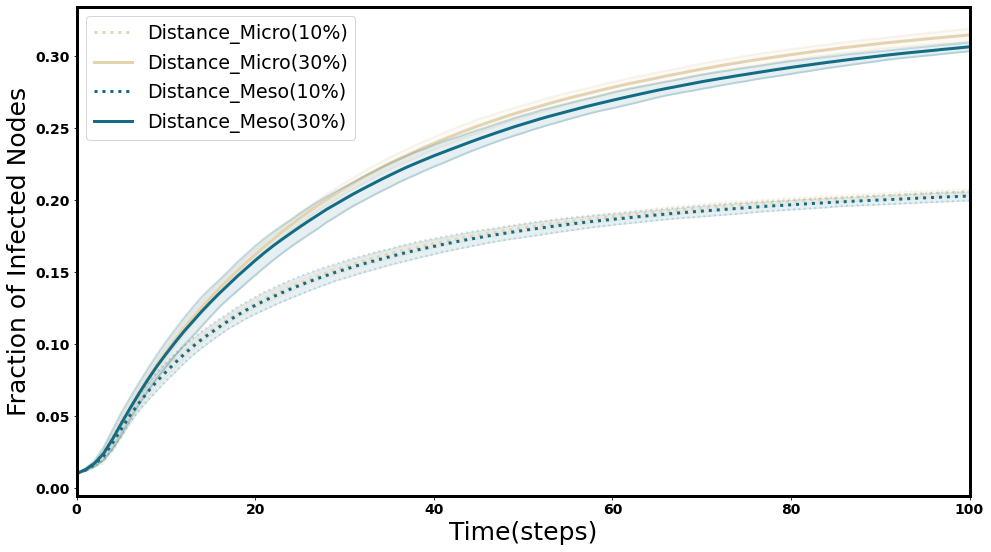

In [271]:
#plot with distance macro
fig, ax = plt.subplots(1,1,figsize=(16,9))

#Distance-micro
plt.plot(df_dm10['time'], df_dm10_mean,label='Distance_Micro(10%)',c='#E4D3B0',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_dm10['time'], df_dm10_min, df_dm10_max, color='#E4D3B0', alpha=.1)
plt.plot(df['time'], df_dm10_min,c='#E4D3B0',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_dm10_max,c='#E4D3B0',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_dm30['time'], df_dm30_mean,label='Distance_Micro(30%)',c='#E4D3B0',linewidth=3.0)
plt.fill_between(df_dm30['time'], df_dm30_min, df_dm30_max, color='#E4D3B0', alpha=.1)
plt.plot(df['time'], df_dm30_min,c='#E4D3B0',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_dm30_max,c='#E4D3B0',linewidth=2.0,alpha=.2)

#Distance
plt.plot(df_d10['time'], df_d10_mean,label='Distance_Meso(10%)',c='#136B84',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_d10['time'], df_d10_min, df_d10_max, color='#136B84', alpha=.1)
plt.plot(df['time'], df_d10_min,c='#136B84',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_d10_max,c='#136B84',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_d30['time'], df_d30_mean,label='Distance_Meso(30%)',c='#136B84',linewidth=3.0)
plt.fill_between(df_d30['time'], df_d30_min, df_d30_max, color='#136B84', alpha=.1)
plt.plot(df['time'], df_d30_min,c='#136B84',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_d30_max,c='#136B84',linewidth=2.0,alpha=.2)


plt.xlim(0,100)
plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/distance_microregion_Meso_real_month_june_SI_0.01_just_missing_dif1%ININ_10_30.jpg')

In [ ]:
#compare Random-random with random-data and distance-random with distance-data


# # Randomly from dataset



In [200]:
#randomly from dataset   
#missing links are randomly selected from the trades happen in the rest of datset
#add to the entire network 10%, 30%
#entire 10%
a=10
l_edge=random.sample(edge_inactive_all_m0,k=round(n_edge*(a/100)))
G_ra_data10=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_ra_data10.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])
    
    
#entire 30%
a=30
l_edge=random.sample(edge_inactive_all_m0,k=round(n_edge*(a/100)))
G_ra_data30=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_ra_data30.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])

In [204]:
df_ra_data10, df_ra_data10_mean, df_ra_data10_min,df_ra_data10_max=multiran_result_SI(G_ra_data10)
df_ra_data30, df_ra_data30_mean, df_ra_data30_min,df_ra_data30_max=multiran_result_SI(G_ra_data30)


In [205]:
df_ra10, df_ra10_mean, df_ra10_min,df_ra10_max=multiran_result_SI(G_random_10)
df_ra30, df_ra30_mean, df_ra30_min,df_ra30_max=multiran_result_SI(G_random_30)

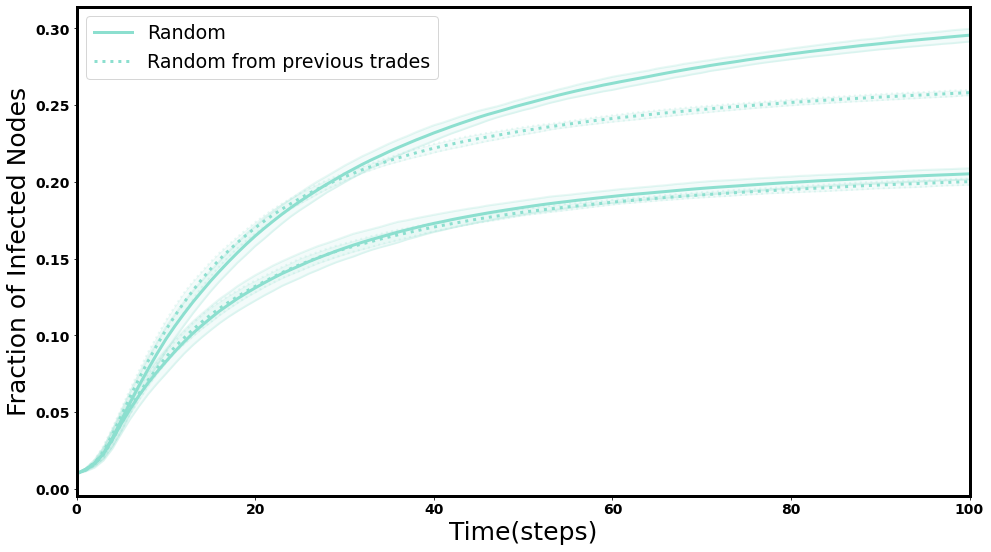

In [209]:
fig, ax = plt.subplots(1,1,figsize=(16,9))


#Random
plt.plot(df_ra10['time'], df_ra10_mean,label='Random',c='#8CDFCF',linewidth=3.0)
plt.fill_between(df_ra10['time'], df_ra10_min, df_ra10_max, color='#8CDFCF', alpha=.1)
plt.plot(df['time'], df_ra10_min,c='#8CDFCF',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_ra10_max,c='#8CDFCF',linewidth=2.0,alpha=.2)

plt.plot(df_ra30['time'], df_ra30_mean,c='#8CDFCF',linewidth=3.0)#,label='Random(30%)'
plt.fill_between(df_ra30['time'], df_ra30_min, df_ra30_max, color='#8CDFCF', alpha=.1)
plt.plot(df['time'], df_ra30_min,c='#8CDFCF',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_ra30_max,c='#8CDFCF',linewidth=2.0,alpha=.2)

#Random from dataset
plt.plot(df_ra10['time'], df_ra_data10_mean,label='Random from previous trades',c='#8CDFCF',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_ra_data10['time'], df_ra_data10_min, df_ra_data10_max, color='#8CDFCF', alpha=.1)
plt.plot(df['time'], df_ra_data10_min,c='#8CDFCF',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_ra_data10_max,c='#8CDFCF',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_ra_data30['time'], df_ra_data30_mean,c='#8CDFCF',linestyle='dotted',linewidth=3.0)#,label='Random(30%)'
plt.fill_between(df_ra_data30['time'], df_ra_data30_min, df_ra_data30_max, color='#8CDFCF', alpha=.1)
plt.plot(df['time'], df_ra_data30_min,c='#8CDFCF',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_ra_data30_max,c='#8CDFCF',linewidth=2.0,linestyle='dotted',alpha=.2)



plt.xlim(0,100)
plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/real_month_june_SI_0.01_just_missing_dif1%ININ_10_30_Random(random&dataset).jpg')

# Distance based on dataset

#for 10 busy locations we strat from one day and increas the size of network to one year and each time calculate the average the jaccard similarity of the set of locations that those 10 location when network is as size of a time window(which start from one day and increase to one year) to the set when network size is one year.

In [235]:
#choose a set of 10 highest hub nodes (based on the sum of ingoing and out going)
#######1 Sum of ingoing and out going
#we should be care that for some slaughter houses ingoing trades are so much that fade all other nodes of having rule in set
#first we should find the number of trades each nodes have in dataset
ln=copy.deepcopy(edges_list_label_all)
origin_trade=pd.DataFrame(ln.groupby(\
['Codigo_do_Local_de_Origem']).agg(outgoing=('weight','sum')).reset_index())
destination_trade=pd.DataFrame(ln.groupby(\
['Codigo_do_Local_de_Destino']).agg(ingoing=('weight','sum')).reset_index())
#How to sort dataframe based on a column in another dataframe in Pandas?
destination_trade = destination_trade.set_index('Codigo_do_Local_de_Destino')
destination_trade = destination_trade.reindex(index=origin_trade['Codigo_do_Local_de_Origem'])
destination_trade = destination_trade.reset_index()
#join
node_list=copy.deepcopy(origin_trade)
node_list['ingoing']=destination_trade['ingoing']
#add ingoing and out going
sum_column = node_list['ingoing'] + node_list['outgoing']
node_list["sum_trades"] = sum_column
#sort
node_list=node_list.sort_values(by=["sum_trades"], ascending=False)
#choose a set of 10 highest hub nodes
list_hub_n=node_list['Codigo_do_Local_de_Origem'][0:10]

#function for find the trade set (the destination that we send and the origins that we recieve)
#year 2013
#find the set of nodes our favourite node trade with
dic_set_node_year={}
start_d=0
end_d=364

def set_year_2013(dataframe,location_name):
    data_part=dataframe.loc[start_d-1<dataframe['DAY']]
    data_part=data_part.loc[data_part['DAY']<end_d+1]
    data_part=data_part.reset_index(drop=True)
    des=data_part[data_part['Codigo_do_Local_de_Origem']==location_name]
    des_location=list(des['Codigo_do_Local_de_Destino'])
    ori=data_part[data_part['Codigo_do_Local_de_Destino']==location_name]
    ori_location=list(ori['Codigo_do_Local_de_Origem'])
    trade_location=set(des_location+ori_location)
    return trade_location

for node in list_hub_n:
    dic_set_node_year[node]=set_year_2013(dataframe,node)
    
    
def set_time_window_day(dataframe,day_number,location_name):
    data_part=dataframe.loc[start_d-1<dataframe['DAY']]
    data_part=data_part.loc[data_part['DAY']<day_number+1]
    data_part=data_part.reset_index(drop=True)
    des=data_part[data_part['Codigo_do_Local_de_Origem']==location_name]
    des_location=list(des['Codigo_do_Local_de_Destino'])
    ori=data_part[data_part['Codigo_do_Local_de_Destino']==location_name]
    ori_location=list(ori['Codigo_do_Local_de_Origem'])
    trade_location=set(des_location+ori_location)
    return trade_location

def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union


dict_JS_days={}
for d in range(1,365):
    dict_node={}
    for node in list_hub_n:
        t1=list(set_time_window_day(dataframe,d,node))
        t2=list(dic_set_node_year[node])
        #calculate jaccard similarity
        dict_node[node]=jaccard_set(t1,t2)
    dict_JS_days[d]=dict_node
    
#find the average
dict_JS_days_mean={}
for d in range(1,365):
    res = sum(dict_JS_days[d].values()) / len(dict_JS_days[d])
    dict_JS_days_mean[d]=res
    
#####2 choose the 10 hub nodes based on the number of outgoing trades
origin_trade=pd.DataFrame(ln.groupby(\
['Codigo_do_Local_de_Origem']).agg(outgoing=('weight','sum')).reset_index())

#sort
origin_trade=origin_trade.sort_values(by=["outgoing"], ascending=False)
#choose a set of 10 highest hub nodes
list_hub_n=origin_trade['Codigo_do_Local_de_Origem'][0:10]
    
dic_outnode_set_node_year={}
for node in list_hub_n:
    dic_outnode_set_node_year[node]=set_year_2013(dataframe,node) 
    
    
dict_outnode_JS_days={}
for d in range(1,365):
    dict_outnode_node={}
    for node in list_hub_n:
        t1=list(set_time_window_day(dataframe,d,node))
        t2=list(dic_outnode_set_node_year[node])
        if len(t1)==0:
            dict_outnode_node[node]=0     
        elif len(t2)==0:
            dict_outnode_node[node]=0
        else:    
        #calculate jaccard similarity
            dict_outnode_node[node]=jaccard_set(t1,t2)
    dict_outnode_JS_days[d]=dict_outnode_node
    
#find the average
dict_outnode_JS_days_mean={}
for d in range(1,365):
    res_outnode = sum(dict_outnode_JS_days[d].values()) / len(dict_outnode_JS_days[d])
    dict_outnode_JS_days_mean[d]=res_outnode
    
#plot the jaccard similarity for both scenarios
#plot the jaccard similarity for both scenarios
#jaccard of 10 hub (base on sum ingoing and out gojng)
day1 = list(dict_outnode_JS_days_mean.keys())           
JS1 = list(dict_outnode_JS_days_mean.values())  
day2 = list(dict_JS_days_mean.keys())           
JS2 = list(dict_JS_days_mean.values())  

fig, ax = plt.subplots(1,1,figsize=(16,9))


#Random
plt.plot(day1,JS1,label='Ingoing+Outgoing',c='#FC1F67',linewidth=3.0)

plt.plot(day2, JS2,label='Outgoing',c='#35939F',linewidth=3.0)#,label='Random(30%)'


plt.xlabel('Day')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Day', fontsize=25)
plt.ylabel('JS value',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/Jaccard_similarity_location set_hub.jpg')



ZeroDivisionError: float division by zero

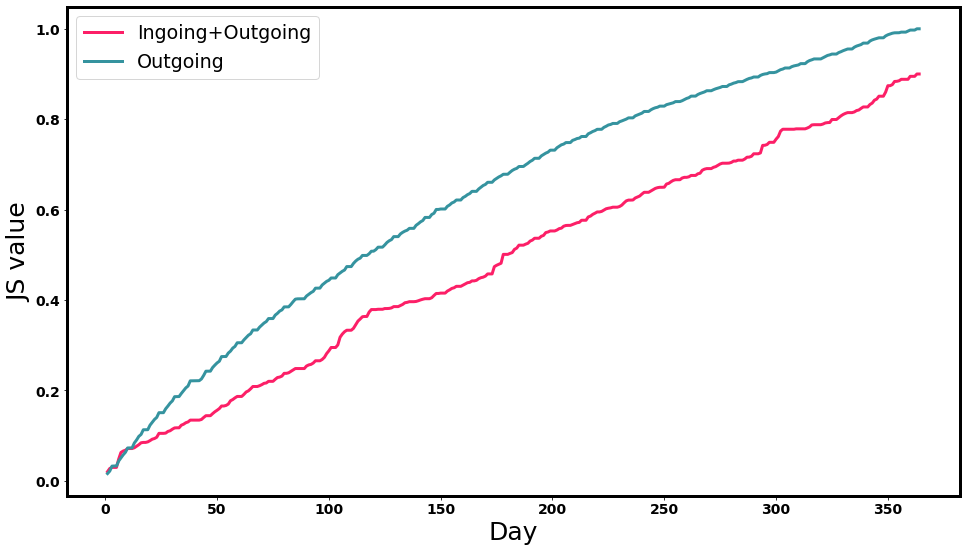

In [265]:
#plot the jaccard similarity for both scenarios
#jaccard of 10 hub (base on sum ingoing and out gojng)
day1 = list(dict_outnode_JS_days_mean.keys())           
JS1 = list(dict_outnode_JS_days_mean.values())  
day2 = list(dict_JS_days_mean.keys())           
JS2 = list(dict_JS_days_mean.values())  

fig, ax = plt.subplots(1,1,figsize=(16,9))


#Random
plt.plot(day1,JS1,label='Ingoing+Outgoing',c='#FC1F67',linewidth=3.0)

plt.plot(day2, JS2,label='Outgoing',c='#35939F',linewidth=3.0)#,label='Random(30%)'


plt.xlabel('Day')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Day', fontsize=25)
plt.ylabel('JS value',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/Jaccard_similarity_location set_hub.jpg')


In [238]:
#plot


{}

In [232]:
node_list

,Codigo_do_Local_de_Origem,outgoing,ingoing,sum_trades
7,b'1883',94,53311.0,53405.0
310678,b'504',47,43204.0,43251.0
3,b'177',18,33046.0,33064.0
301746,b'3225',11,32549.0,32560.0
308086,b'3935',15,32185.0,32200.0
...,...,...,...,...
304493,b'35373',4,NaN,NaN
307854,b'39093',1,NaN,NaN
309012,b'40371',8,NaN,NaN
309230,b'40622',1,NaN,NaN


### compare the recent and frequrnt dataset to see if they are the same behaviour so it is the reason that the scenario of recency and frequency plot are the same

In [ ]:
#compare recency and frequency when it is 10 days before and after for recency


In [ ]:
#compare missing links added localy to one region

In [ ]:
#compare epidemic threshold

# compre the spatial spreading of disease in this four missing scerios to see if the spatial spreading in different
